# <center> HOMEWORK-4 </center>

## <center> KRISHNA VAMSI GUNTUPALLI </center>

### P1: Optimal K for PLSI

In [1869]:
from scipy.io import loadmat
import numpy as np, matplotlib.pyplot as plt, random

In [1870]:
faces = loadmat('data/faces.mat')

In [1871]:
X = loadmat('data/faces.mat')['X']

In [1872]:
X.shape

(441, 8)

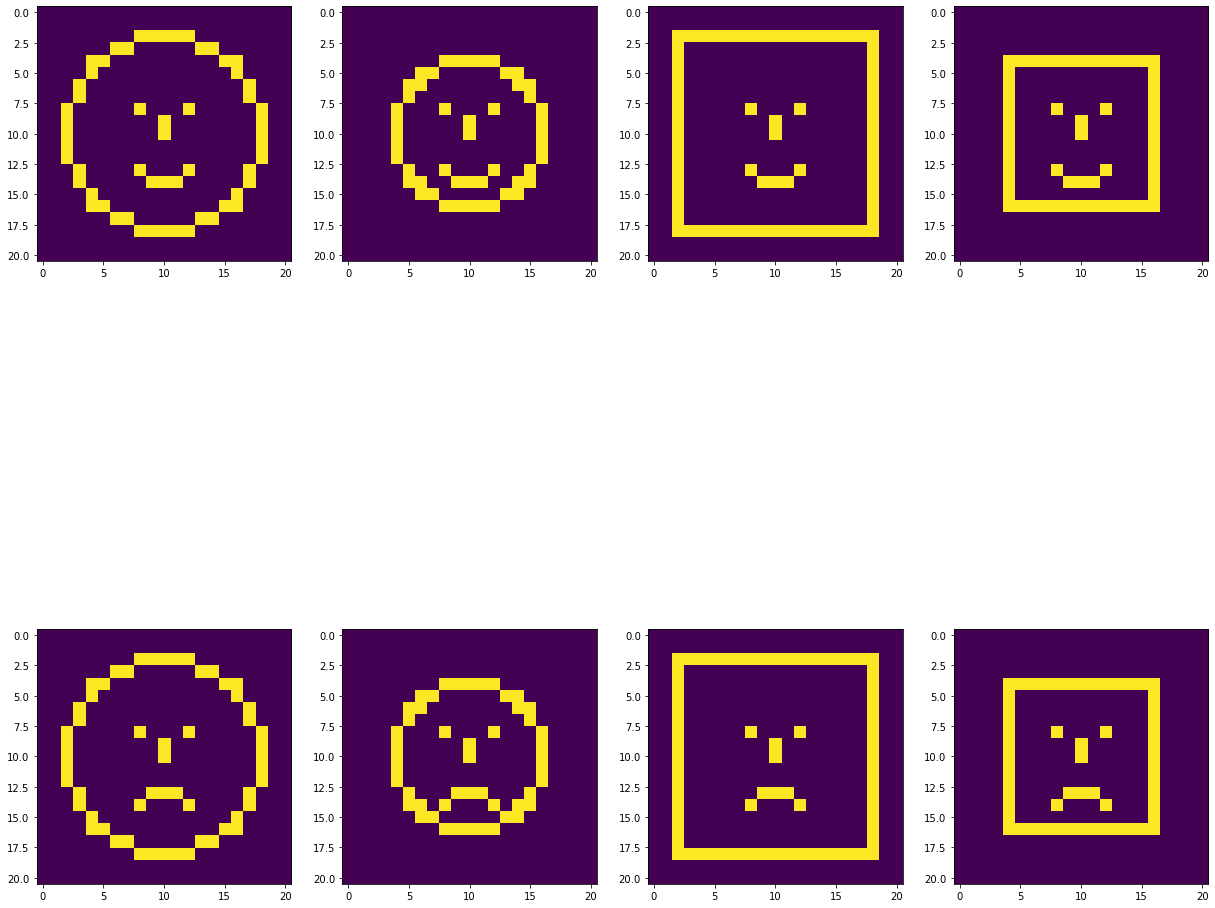

In [1873]:
fig = plt.figure(figsize=(21,21))
for i in range(1, 9):
    fig.add_subplot(2, 4, i)
    plt.imshow(X[:, i-1].reshape(21,21))
plt.show()

In [1874]:
B=np.random.rand(441,6)

In [1875]:
B.shape

(441, 6)

In [1876]:
B

array([[0.98984419, 0.03256933, 0.09971777, 0.72214767, 0.98545958,
        0.4364266 ],
       [0.03034007, 0.96488574, 0.63098275, 0.42512561, 0.09619268,
        0.30110527],
       [0.78324205, 0.95740215, 0.00395867, 0.9038479 , 0.87042791,
        0.6443694 ],
       ...,
       [0.71876982, 0.27243924, 0.02991939, 0.24011327, 0.71294632,
        0.19254591],
       [0.79096125, 0.76865364, 0.89292735, 0.47341564, 0.85631607,
        0.6055733 ],
       [0.87111088, 0.82902489, 0.83268674, 0.99018064, 0.69539999,
        0.77637623]])

In [1877]:
O=np.random.rand(6,8)

In [1878]:
O.shape

(6, 8)

In [1879]:
O

array([[0.84750935, 0.25551151, 0.21608424, 0.49410671, 0.7585962 ,
        0.54537462, 0.58074317, 0.95875191],
       [0.35495236, 0.19639444, 0.95397753, 0.8889471 , 0.79390514,
        0.8612356 , 0.1456204 , 0.54003612],
       [0.99597589, 0.89857148, 0.97740066, 0.1618631 , 0.20960878,
        0.81854727, 0.93591095, 0.37602574],
       [0.16131637, 0.79001933, 0.1605741 , 0.13418949, 0.47413683,
        0.81366606, 0.68290478, 0.28506353],
       [0.59771801, 0.2629922 , 0.26012207, 0.44282856, 0.01368021,
        0.37646761, 0.36609458, 0.99442832],
       [0.77048988, 0.70004566, 0.96864384, 0.65168734, 0.10942222,
        0.27604767, 0.15279752, 0.48652126]])

In [1880]:
def update_values(X,Y):
    temp=[]
    count=0
    
    for j in range(X.shape[1]):
        temp.append(X[:,j].reshape(-1,1).dot(Y[j,:].reshape(1,-1)))
    
    for i in temp:
        count = count + i
        
    return temp/count+1e-50

In [1881]:
def estimateB(X,Y):
    final=[]
    x = Y.shape[0]
    for j in range(x):
        a=X*Y[j,:,:]
        a=np.sum(a,axis=1)
        a/=np.sum(a,axis=0)+1e-50
        final.append(a)
    return np.transpose(final)+1e-50

In [1882]:
def estimateO(X,Y):
    final=[]
    x = Y.shape[0]
    for j in range(x):
        b=X*Y[j,:,:]
        b=np.sum(b,axis=0)
        final.append(b)

    final=final/np.sum(final,axis=0)+1e-50
    
    return final+1e-50

In [1883]:
for i in range(1000):
    
    Z=update_values(B,O)
    
    B=estimateB(X,Z)
    O=estimateO(X,Z)
    
    B=B/np.matmul((np.ones((441,441))),B)
    O=O/np.matmul((np.ones((6,6))),O)

In [1884]:
B.shape

(441, 6)

In [1885]:
B

array([[1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50],
       [1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50],
       [1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50],
       ...,
       [1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50],
       [1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50],
       [1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50, 1.e-50]])

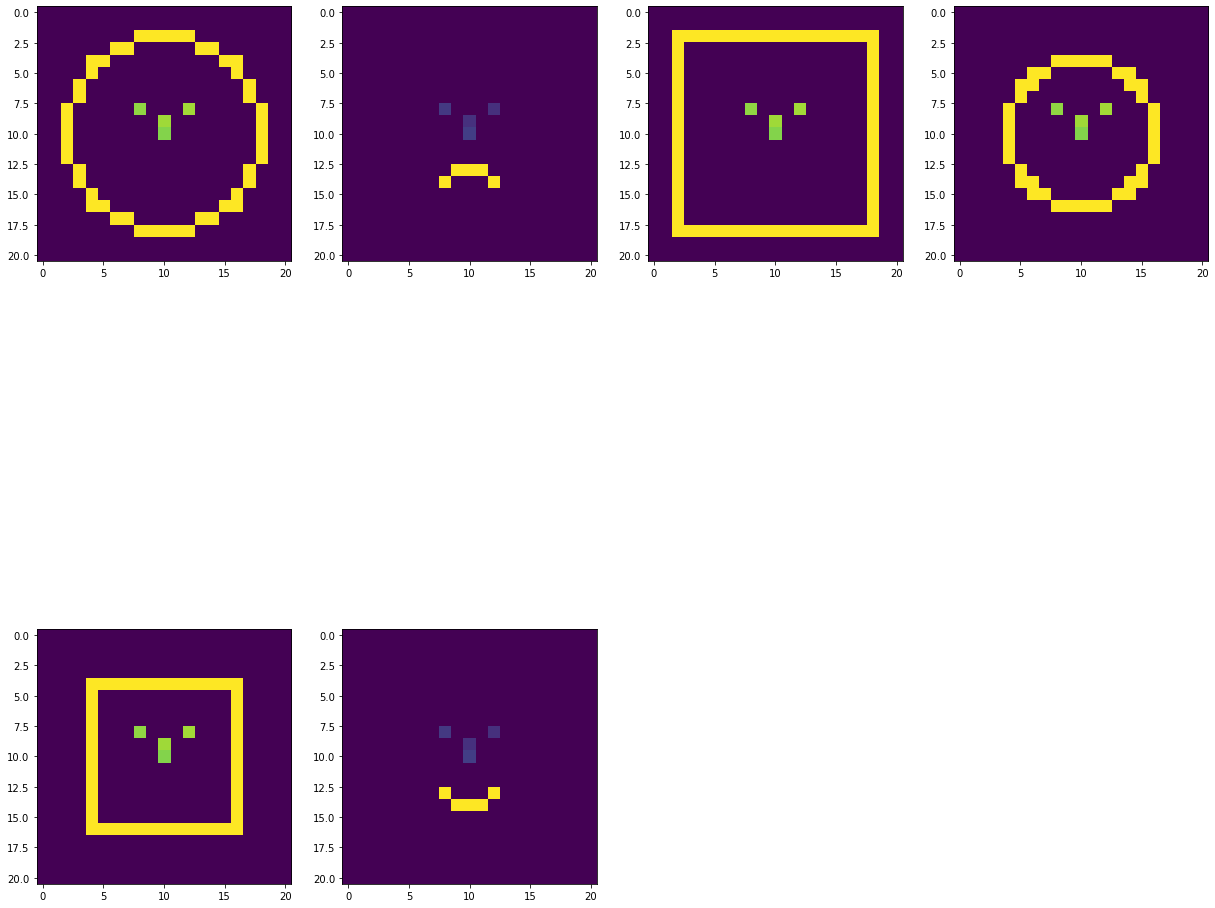

In [1886]:
fig = plt.figure(figsize=(21,21))
for i in range(1, 7):
    fig.add_subplot(2, 4, i)
    plt.imshow(B[:, i-1].reshape(21,21))
plt.show()

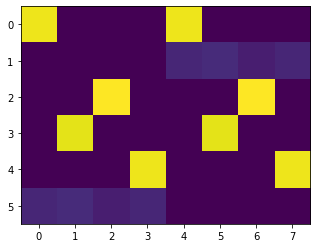

In [1887]:
plt.imshow(O)

In [1888]:
final = np.matmul(B,O)

In [1889]:
final.shape

(441, 8)

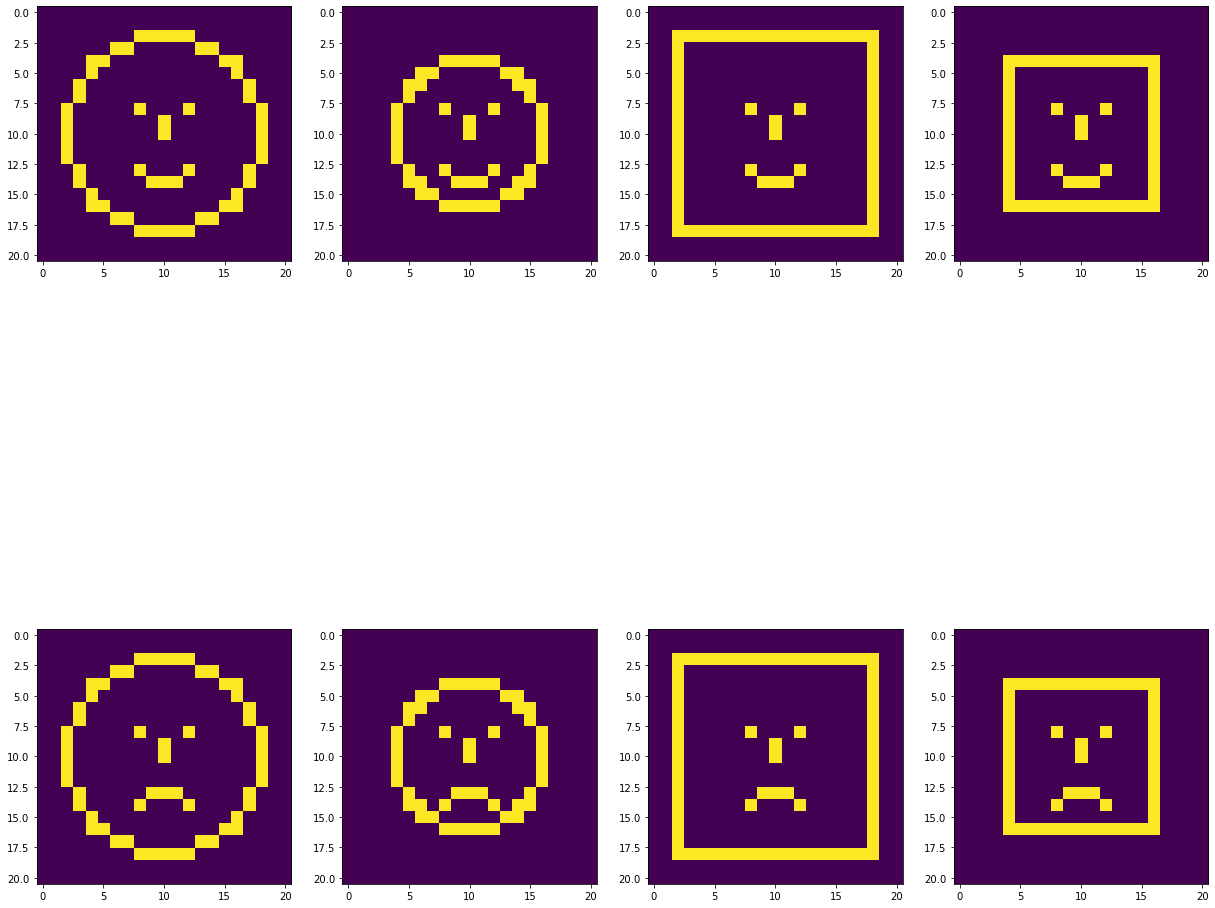

In [1890]:
fig = plt.figure(figsize=(21,21))
for i in range(1, 9):
    fig.add_subplot(2, 4, i)
    plt.imshow(final[:, i-1].reshape(21,21))
plt.show()

### P2: Stereo Matching (revisited)

In [1930]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, random
from PIL import Image
from scipy.spatial import distance

In [1931]:
img1 = Image.open("data/im0.ppm")

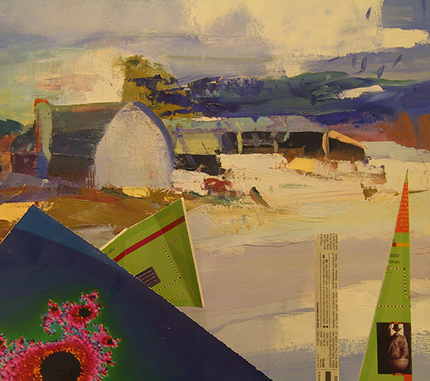

In [1932]:
img1

In [1933]:
img1.size

(430, 381)

In [1934]:
img2 = Image.open("data/im8.ppm")

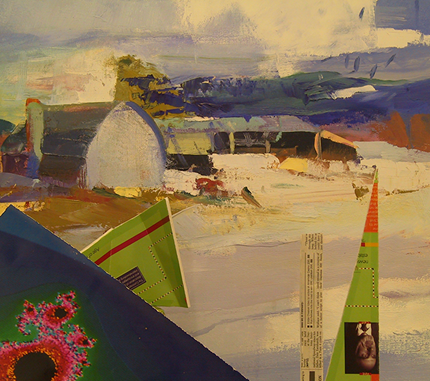

In [1935]:
img2

In [1936]:
img2.size

(430, 381)

In [1937]:
img1_matrix = np.asarray(img1)/255

In [1938]:
img1_matrix

array([[[0.6       , 0.58039216, 0.54509804],
        [0.61176471, 0.58431373, 0.5254902 ],
        [0.60392157, 0.57647059, 0.50980392],
        ...,
        [0.38431373, 0.4       , 0.45098039],
        [0.39607843, 0.40392157, 0.44313725],
        [0.38823529, 0.40392157, 0.44313725]],

       [[0.61176471, 0.58039216, 0.54117647],
        [0.60392157, 0.57647059, 0.52941176],
        [0.61960784, 0.59215686, 0.52156863],
        ...,
        [0.36862745, 0.40392157, 0.44705882],
        [0.38431373, 0.4       , 0.44313725],
        [0.39607843, 0.39607843, 0.45882353]],

       [[0.61568627, 0.58431373, 0.54901961],
        [0.61960784, 0.59607843, 0.54117647],
        [0.63137255, 0.6       , 0.5254902 ],
        ...,
        [0.37647059, 0.39607843, 0.43529412],
        [0.38039216, 0.39215686, 0.42745098],
        [0.40784314, 0.38823529, 0.43529412]],

       ...,

       [[0.51372549, 0.40784314, 0.37647059],
        [0.52941176, 0.34509804, 0.34509804],
        [0.54509804, 0

In [1939]:
img1_matrix.shape

(381, 430, 3)

In [1940]:
img2_matrix = np.asarray(img2)/255

In [1941]:
img2_matrix

array([[[0.59607843, 0.57254902, 0.50980392],
        [0.61960784, 0.59215686, 0.49411765],
        [0.56862745, 0.57254902, 0.46666667],
        ...,
        [0.40784314, 0.41568627, 0.47843137],
        [0.41176471, 0.41568627, 0.47843137],
        [0.41960784, 0.42745098, 0.47058824]],

       [[0.61176471, 0.59215686, 0.49803922],
        [0.6       , 0.57254902, 0.47843137],
        [0.57254902, 0.56078431, 0.48235294],
        ...,
        [0.41568627, 0.40784314, 0.46666667],
        [0.40392157, 0.40784314, 0.45882353],
        [0.41960784, 0.41176471, 0.46666667]],

       [[0.61176471, 0.58431373, 0.50196078],
        [0.59215686, 0.55294118, 0.49019608],
        [0.59215686, 0.56862745, 0.51372549],
        ...,
        [0.40784314, 0.41568627, 0.47843137],
        [0.39607843, 0.41960784, 0.45098039],
        [0.39215686, 0.40784314, 0.45882353]],

       ...,

       [[0.53333333, 0.14901961, 0.09019608],
        [0.49019608, 0.13333333, 0.09411765],
        [0.45098039, 0

In [1942]:
img2_matrix.shape

(381, 430, 3)

In [1943]:
rows = img2_matrix.shape[0]

In [1944]:
columns = img2_matrix.shape[1]-40

In [1945]:
disparity = np.full([rows,columns],None)
for i in range (rows):
    for k in range (columns):
        dist = []
        for j in range (k,k+40):
            dist.append(distance.euclidean(img1_matrix[i][j],img2_matrix[i][k]))
            disparity[i][k] = np.argmin(dist)

In [1946]:
disparity.shape

(381, 390)

In [1947]:
disparity = disparity.reshape(-1)

In [1948]:
disparity = np.array(disparity, dtype='i')

In [1949]:
disparity

array([ 2,  7,  0, ..., 27, 32, 33], dtype=int32)

(array([13563., 24606., 35571., 16197., 11770., 11854., 12337.,  8663.,
         8215.,  5814.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

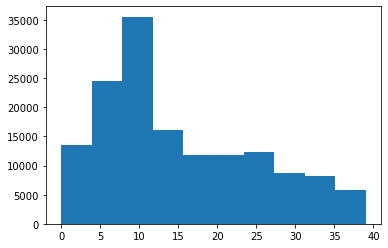

In [1950]:
plt.hist(disparity)

No. of clusters are 4

In [1951]:
mean=random.sample(list(set(disparity)),4)
mean = np.reshape(mean,(4,))
variance=np.random.rand(4,)
P=np.random.rand(4,)

In [1952]:
def E_step(X,Y,Z,W):
    temp=[]
    l = len(Y)
    for j in range(l):
        temp1 = (-1/2)*np.multiply(np.multiply(np.subtract(X,Y[j]),np.divide(1,Z[j])),np.subtract(X,Y[j]))
        temp2 = np.power(1/(2*3.1415*Z[j]),0.5)
        result = np.multiply(temp2,np.exp(temp1))
        temp.append(result)
    temp = tuple(temp)
    
    E_s=np.column_stack(temp)
   
    E_s=np.multiply(E_s,W/np.dot(E_s,(W.reshape(4,1))))
    
    
    return E_s

In [1953]:
def mean_u(X,Y):
    
    temp1 = np.sum(np.multiply(X,Y.reshape(148590,1)),axis=0)
    temp2 = np.sum(X,axis=0)
    m_u = temp1/temp2
    
    return m_u

In [1954]:
def cluster_u(X):
    
    return np.sum(X,axis=0)/len(X)

In [1955]:
def variance_u(X,Y,Z):
    v_u=[]
    for i in range(X.shape[1]):
        
        temp = np.dot(X[:,i],np.power(Y-Z[i],2))
        
        v_u.append(temp/sum(X[:,i]))

    return v_u

In [1956]:
for i in range(50):
    
    U=E_step(disparity,mean,variance,P)
    
    mean=mean_u(U,disparity)
    
    variance=variance_u(U,disparity,mean)
    
    P=cluster_u(U)

In [1957]:
mean

array([19.8587288 , 31.42515071, 15.        ,  7.13347483])

In [1958]:
variance

[41.84886143286269,
 22.809031028735934,
 2.3337661020058913e-24,
 11.97254328230353]

In [1959]:
P

array([0.29833985, 0.15747318, 0.03010297, 0.51408401])

In [1960]:
ind=[]
for i in U:
    ind.append(np.argmax(i))

In [1961]:
c_temp = {0:[], 1:[], 2:[], 3:[]}
l = len(ind)

for i in range(l):
    c_temp[ind[i]]+=[disparity[i]]
    
for j in c_temp:
    cluster_length = []
    cluster_length.append((len(c_temp[j])))
    print(cluster_length)
    j+1;

[39796]
[22692]
[4473]
[81629]


In [1962]:
cluster_length

[81629]

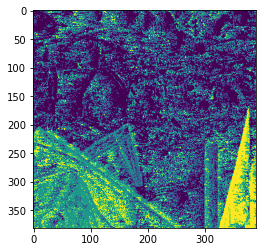

In [1963]:
X=[]
for i in np.argmax(U,axis=1):
    X.append(mean[i])
X=np.array(X)
X=X.reshape(381,390)
plt.imshow(X);

#### ICM

In [1964]:
Y=np.argmax(U,axis=1).reshape(381,390)

In [1965]:
Y.shape

(381, 390)

In [1966]:
for k in range(0,50):
    for i in range(381):
        for j in range(390):
            result=[]
            temp=[(-1+i,-1+j),(-1+i,0+j),(-1+i,1+j),(0+i,-1+j),(0+i,1+j),(1+i,-1+j),(1+i,0+j),(1+i,1+j)]
            n1 =[ ]
            for nei in temp:
                if 0<=nei[0]<381 and  0<=nei[1]<390:
                    n1.append(nei)
            for C in range(4):
                temp1 = (1/np.sqrt(np.multiply(2,np.multiply(np.pi,np.square(variance[C])))))
                temp2 = -(np.square(X[i,j]-mean[C]))
                temp3 = np.multiply(2,np.square(variance[C]))
                l = np.multiply(temp1,(np.exp(temp2/temp3)))
                
                p = 1
                for n in n1:
                    if C == Y[n]:
                        p*= 1
                    else:
                        p*=np.exp(-10 ** 2)
            
                result.append(l * p)
        
            result=np.array(result)
            Y[i,j]=np.argmax(result)
            X[i,j]=mean[np.argmax(result)]

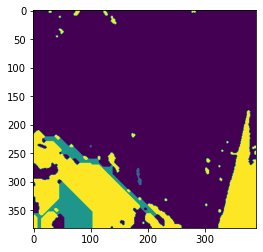

In [1967]:
plt.imshow(X);

### P3: Rock or Metal

In [1711]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np

In [1712]:
trX=loadmat('data/trX.mat')['trX']

In [1713]:
trX

array([[0.02185692, 0.0374808 , 0.02865593, 0.02688613, 0.04539449,
        0.04465071, 0.0360124 , 0.02831497, 0.06900784, 0.02023908,
        0.0262515 , 0.01617442, 0.00706707, 0.01983267, 0.0040175 ,
        0.00987314, 0.03507618, 0.02879716, 0.02197815, 0.01406544,
        0.02530778, 0.02862408, 0.03250512, 0.0200986 , 0.02615207,
        0.02379799, 0.02449906, 0.00651797, 0.02013253, 0.03367453,
        0.00981787, 0.01900666, 0.05168731, 0.01776875, 0.03729164,
        0.01587179, 0.04826671, 0.01381642, 0.05241369, 0.0223199 ,
        0.02358714, 0.02789653, 0.01611161, 0.02295714, 0.02207349,
        0.01022517, 0.01592949, 0.0212892 , 0.02177715, 0.0125184 ,
        0.02504029, 0.02835172, 0.01841835, 0.03807062, 0.00491671,
        0.02395376, 0.03293973, 0.01603711, 0.00784404, 0.0027986 ,
        0.01126383, 0.0082368 , 0.00444617, 0.0031761 , 0.01312249,
        0.0144503 , 0.00267339, 0.01159446, 0.00886151, 0.00247479,
        0.00356825, 0.02845127, 0.02973045, 0.03

In [1714]:
trX.shape

(2, 160)

In [1715]:
trY=loadmat('data/trY.mat')['trY']

In [1716]:
trY

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]],
      dtype=int16)

In [1717]:
trY.shape

(1, 160)

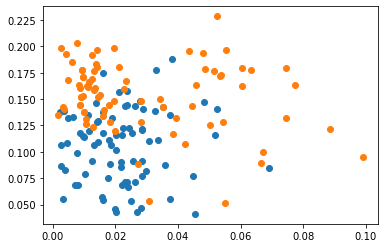

In [1718]:
plt.scatter(trX[0,:80],trX[1,:80]);
plt.scatter(trX[0,80:],trX[1,80:]);

In [1719]:
trX_trY_append = np.append(trX,trY,axis=0)

In [1720]:
trX_trY_append

array([[ 0.02185692,  0.0374808 ,  0.02865593,  0.02688613,  0.04539449,
         0.04465071,  0.0360124 ,  0.02831497,  0.06900784,  0.02023908,
         0.0262515 ,  0.01617442,  0.00706707,  0.01983267,  0.0040175 ,
         0.00987314,  0.03507618,  0.02879716,  0.02197815,  0.01406544,
         0.02530778,  0.02862408,  0.03250512,  0.0200986 ,  0.02615207,
         0.02379799,  0.02449906,  0.00651797,  0.02013253,  0.03367453,
         0.00981787,  0.01900666,  0.05168731,  0.01776875,  0.03729164,
         0.01587179,  0.04826671,  0.01381642,  0.05241369,  0.0223199 ,
         0.02358714,  0.02789653,  0.01611161,  0.02295714,  0.02207349,
         0.01022517,  0.01592949,  0.0212892 ,  0.02177715,  0.0125184 ,
         0.02504029,  0.02835172,  0.01841835,  0.03807062,  0.00491671,
         0.02395376,  0.03293973,  0.01603711,  0.00784404,  0.0027986 ,
         0.01126383,  0.0082368 ,  0.00444617,  0.0031761 ,  0.01312249,
         0.0144503 ,  0.00267339,  0.01159446,  0.0

In [1721]:
trX_trY_append.shape

(3, 160)

In [1722]:
trX = np.transpose(trX)

In [1723]:
trX.shape

(160, 2)

In [1724]:
for i in range(2):
    
    trX_mean = np.mean(trX[:,i])
    trX_max = np.max(trX[:,i])
    trX_min = np.min(trX[:,i])
   
    trX[:,i]= (trX[:,i]-trX_mean)/(trX_max-trX_min)

In [1725]:
trX = np.transpose(trX)

In [1726]:
trX.shape

(2, 160)

In [1727]:
trX

array([[-3.34208005e-02,  1.27373411e-01,  3.65517377e-02,
         1.83376569e-02,  2.08817722e-01,  2.01163008e-01,
         1.12261261e-01,  3.30427110e-02,  4.51836023e-01,
        -5.00708660e-02,  1.18063742e-02, -9.19025627e-02,
        -1.85631494e-01, -5.42535007e-02, -2.17016325e-01,
        -1.56752669e-01,  1.02626118e-01,  3.80052167e-02,
        -3.21731323e-02, -1.13607258e-01,  2.09397002e-03,
         3.62239060e-02,  7.61658603e-02, -5.15166401e-02,
         1.07830105e-02, -1.34441549e-02, -6.22895958e-03,
        -1.91282537e-01, -5.11674224e-02,  8.82009473e-02,
        -1.57321469e-01, -6.27544332e-02,  2.73580611e-01,
        -7.54944067e-02,  1.25426654e-01, -9.50171182e-02,
         2.38377305e-01, -1.16170141e-01,  2.81056290e-01,
        -2.86559754e-02, -1.56140809e-02,  2.87362414e-02,
        -9.25489904e-02, -2.20978091e-02, -3.11919123e-02,
        -1.53129667e-01, -9.44232536e-02, -3.92634661e-02,
        -3.42416886e-02, -1.29528735e-01, -6.58879741e-0

In [1728]:
class perceptron:
    def __init__(self,n):
        self.w = np.random.randn(n+1,1)
        
    def train(self,X,Y):
        temp=(np.ones(160,))
        temp=temp.reshape(160,1)
        X =np.transpose(np.append(np.transpose(X),temp,axis=1))
        
        acc=[]
        
        for i in range(10000):
            a = self.forward(X)
            acc.append(self.error(a,Y))
            self.backward(a,X,Y)
    
    def forward(self,X):
        temp = np.dot(np.transpose(self.w),(X))
        temp1 = np.tanh(temp)
        return temp1
    
    def backward(self,a,X,Y):
        wts=np.full((160,), 0.00625)
        wts=np.transpose(wts)
        temp = 1 - (np.tanh(np.dot(np.transpose(self.w),(X)))*np.tanh(np.dot(np.transpose(self.w),(X))))
        temp1=np.dot(X,(np.transpose(np.multiply((np.multiply(wts,(Y-a))),(temp)))))
        self.w += np.multiply(((1/(2*len(Y)))*0.8),(temp1))
        
    def error(self,a,Y):
        temp = (np.multiply((Y-a),(np.transpose(Y-a))))[0]
        return 1/2*temp
    
    def predict(self,X):
        temp=(np.ones(X.shape[1],))
        temp=temp.reshape(X.shape[1],1)
        X =np.transpose(np.concatenate((np.transpose(X),temp),axis=1))
        result=self.forward(X)
        return result

In [1729]:
model=perceptron(2)

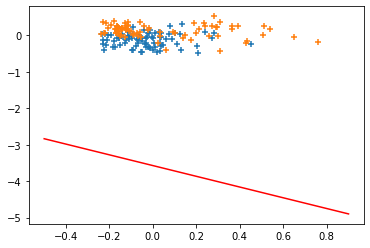

In [1730]:
temp=np.array([i*0.1 for i in range(-5,10)])
y=-(model.w[0]*temp/model.w[1])-(model.w[2]/model.w[1])

plt.plot(list(temp),list(y),color='r')
plt.scatter(trX[0,:80],trX[1,:80],marker='+');
plt.scatter(trX[0,80:],trX[1,80:],marker='+');

In [1731]:
model.train(trX,trY[0])

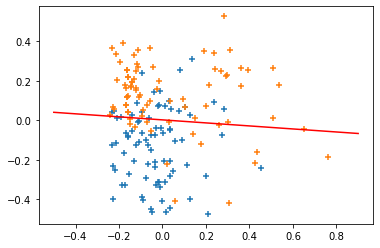

In [1732]:
temp=np.array([i*0.1 for i in range(-5,10)])
y=-(model.w[0]*x/model.w[1])-(model.w[2]/model.w[1])

plt.plot(list(temp),list(y),color='r')
plt.scatter(trX[0,:80],trX[1,:80],marker='+');
plt.scatter(trX[0,80:],trX[1,80:],marker='+');

As we can see in the plot, the prediction is not good

In [1733]:
class Adaboost_Algorithm:
    def __init__(self,n):
        self.n = n
        self.a = None
        self.w = None
    def train(self,X,Y):
        X_shape = X.shape[1]
        self.w = np.full((X.shape[1],), 1/X.shape[1])
        self.a = []
        self.b = []
        self.e = []
        
        for i in range (2000):
            temp = perceptron(2)
            temp.train(X,Y)
            self.a.append(temp)
            
            temp1 = np.sign(temp.predict(X))
            
            err_temp1 = np.dot(self.w,((temp1!=Y).flatten()))
            err_temp2 = sum(self.w)
            err = err_temp1/err_temp2
            
            be = np.multiply(0.5,np.log((1-err)/err))
            
            self.b.append(be)
            self.e.append(err)
            
            self.w*=(np.exp(np.multiply(-be,np.multiply(Y,temp1)))).flatten()
            
        final = []
        for i in self.a:
            final.append(np.sign(i.predict(X)).flatten())
        final=np.transpose(np.array(final))
        final_shape = final.shape[0]
        
        end = []
        
        for j in range (final_shape):
            end.append(np.sign(sum(final[j]*self.b)))
            
        temp2 = sum(np.array(end)==Y)*100/len(Y)
        print ("Accuracy", temp2)
        return np.array((end)==Y)
    
    def predict(self,X):
        final=[]
        for i in self.a:
            final.append(np.sign(i.predict(X)).flatten())
        
        final=np.transpose(np.array(final))
        
        end=[]
        for j in range(final.shape[0]):
            end.append(np.sign(sum(np.multiply(final[j],self.b))))    
            
        
        return np.array(end)

In [1674]:
model=Adaboost_Algorithm(2000)

In [1675]:
result=model.train(trX,trY[0])

Accuracy 98.75


In [1676]:
a, b = np.meshgrid(np.arange(-0.5, 1, 0.01),np.arange(-1, 1, 0.01))

In [1677]:
a

array([[-0.5 , -0.49, -0.48, ...,  0.97,  0.98,  0.99],
       [-0.5 , -0.49, -0.48, ...,  0.97,  0.98,  0.99],
       [-0.5 , -0.49, -0.48, ...,  0.97,  0.98,  0.99],
       ...,
       [-0.5 , -0.49, -0.48, ...,  0.97,  0.98,  0.99],
       [-0.5 , -0.49, -0.48, ...,  0.97,  0.98,  0.99],
       [-0.5 , -0.49, -0.48, ...,  0.97,  0.98,  0.99]])

In [1678]:
a.shape

(200, 150)

In [1679]:
b

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
       [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       ...,
       [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
       [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
       [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]])

In [1680]:
b.shape

(200, 150)

In [1681]:
Z=model.predict(np.transpose(np.column_stack((a.flatten(), b.flatten())))).reshape(200,150)

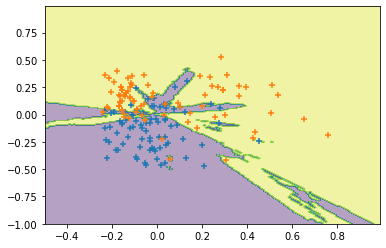

In [1682]:
plt.contourf(a,b,Z,alpha=0.4);
plt.scatter(trX[0,:80],trX[1,:80],marker='+');
plt.scatter(trX[0,80:],trX[1,80:],marker='+');

Apart from 1 or 2 points, most of them are perfectly predicted.

### P4: PLSI for Analyzing Twitter Stream

In [1537]:
from scipy.io import loadmat 
from matplotlib import pyplot as plt
import numpy as np

In [1538]:
twitter_mat = loadmat('data/twitter.mat')

In [1539]:
twitter_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Apr  8 02:28:48 2017',
 '__version__': '1.0',
 '__globals__': [],
 'Xte': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Xtr': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'YteMat': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         1,

In [1540]:
X_te = loadmat('data/twitter.mat')['Xte']

In [1541]:
X_te

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1542]:
X_te.shape

(891, 193)

In [1543]:
X_tr = loadmat('data/twitter.mat')['Xtr']

In [1544]:
X_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1545]:
X_tr.shape

(891, 773)

In [1546]:
Y_te_Mat = loadmat('data/twitter.mat')['YteMat']

In [1547]:
Y_te_Mat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [1548]:
Y_te_Mat.shape

(3, 193)

In [1549]:
Y_tr_Mat = loadmat('data/twitter.mat')['YtrMat']

In [1550]:
Y_tr_Mat

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [1551]:
Y_tr_Mat.shape

(3, 773)

In [1552]:
B=np.random.rand(891,50)

In [1553]:
B

array([[0.20684634, 0.27390861, 0.52151637, ..., 0.32974697, 0.71443912,
        0.78083796],
       [0.35493269, 0.99756166, 0.03326418, ..., 0.78597344, 0.26517115,
        0.17088411],
       [0.9161431 , 0.27191809, 0.74199377, ..., 0.60120402, 0.97206292,
        0.78137356],
       ...,
       [0.86052156, 0.33846781, 0.13670858, ..., 0.62718645, 0.8234282 ,
        0.51332908],
       [0.77794291, 0.98037711, 0.41307239, ..., 0.51974307, 0.27174552,
        0.06278491],
       [0.42002353, 0.2744347 , 0.72964487, ..., 0.2225499 , 0.25446106,
        0.52586533]])

In [1554]:
for i in range(50):
    B[:,i] = B[:,i]/np.sum(B[:,i])

In [1555]:
B

array([[4.53057543e-04, 6.01354700e-04, 1.13215908e-03, ...,
        7.49645955e-04, 1.69607758e-03, 1.72237265e-03],
       [7.77412508e-04, 2.19010419e-03, 7.22131533e-05, ...,
        1.78683008e-03, 6.29515990e-04, 3.76936239e-04],
       [2.00663711e-03, 5.96984605e-04, 1.61079312e-03, ...,
        1.36677575e-03, 2.30767616e-03, 1.72355407e-03],
       ...,
       [1.88480872e-03, 7.43091672e-04, 2.96780436e-04, ...,
        1.42584412e-03, 1.95481753e-03, 1.13230147e-03],
       [1.70393589e-03, 2.15237624e-03, 8.96738202e-04, ...,
        1.18158260e-03, 6.45123526e-04, 1.38490969e-04],
       [9.19981600e-04, 6.02509712e-04, 1.58398491e-03, ...,
        5.05944393e-04, 6.04090241e-04, 1.15995392e-03]])

In [1556]:
O = np.random.rand(50,773)

In [1557]:
O

array([[0.40174541, 0.40868543, 0.31931731, ..., 0.33499171, 0.92847348,
        0.01773733],
       [0.64476932, 0.078874  , 0.13745606, ..., 0.67074218, 0.10534818,
        0.98296746],
       [0.04515233, 0.24915582, 0.19280192, ..., 0.63395557, 0.66238321,
        0.63679523],
       ...,
       [0.67646253, 0.06763977, 0.67424991, ..., 0.79406516, 0.13289929,
        0.01454875],
       [0.52184808, 0.8675784 , 0.14951766, ..., 0.96800482, 0.48035595,
        0.82679642],
       [0.41099237, 0.57413459, 0.90809657, ..., 0.08492599, 0.58182568,
        0.6457064 ]])

In [1558]:
for i in range(773):
    O[:,i] = O[:,i]/np.sum(O[:,i])

In [1559]:
O

array([[0.01525775, 0.01739604, 0.01460852, ..., 0.01443506, 0.04095342,
        0.00074343],
       [0.02448747, 0.00335734, 0.00628851, ..., 0.02890282, 0.00464673,
        0.04119941],
       [0.00171482, 0.01060553, 0.00882054, ..., 0.02731766, 0.02921662,
        0.02669019],
       ...,
       [0.02569113, 0.00287914, 0.03084641, ..., 0.03421691, 0.00586197,
        0.00060979],
       [0.01981909, 0.03692922, 0.00684032, ..., 0.04171211, 0.0211877 ,
        0.03465377],
       [0.01560894, 0.02443853, 0.04154471, ..., 0.00365953, 0.02566336,
        0.02706369]])

In [1560]:
def update_values(X,Y):
    temp=[]
    count=0
    
    for j in range(X.shape[1]):
        temp.append(X[:,j].reshape(-1,1).dot(Y[j,:].reshape(1,-1)))
    
    for i in temp:
        count = count + i
        
    return temp/count+1e-50

In [1561]:
def estimateB(X,Y):
    final=[]
    x = Y.shape[0]
    for j in range(x):
        a=np.multiply(X,Y[j,:,:])
        a=np.sum(a,axis=1)
        a/=np.sum(a,axis=0)+1e-50
        final.append(a)
    return np.transpose(final)+1e-50

In [1562]:
def estimateO(X,Y):
    final=[]
    x = Y.shape[0]
    for j in range(x):
        b=np.multiply(X,Y[j,:,:])
        b=np.sum(b,axis=0)
        final.append(b)

    final=final/np.sum(final,axis=0)+1e-50
    
    return final+1e-50

In [1563]:
for i in range(50):
    
    Z=update_values(B,O)
    
    B=estimateB(X_tr,Z )
    O=estimateO(X_tr,Z)

In [1564]:
Z

array([[[1.00000000e-50, 1.78193806e-29, 1.50626270e-44, ...,
         1.24561811e-07, 1.00000000e-50, 2.26700685e-26],
        [1.00000000e-50, 1.00000000e-50, 1.00000000e-50, ...,
         1.86932492e-48, 1.00000000e-50, 1.00000382e-50],
        [1.00000000e-50, 1.00000000e-50, 1.59800198e-39, ...,
         1.00005756e-50, 1.00000000e-50, 1.00000000e-50],
        ...,
        [3.87580226e-25, 2.04835185e-26, 1.76932922e-18, ...,
         1.30277293e-07, 7.80516054e-47, 2.37321583e-26],
        [3.87580226e-25, 2.04835185e-26, 1.76932922e-18, ...,
         1.30277293e-07, 7.80516054e-47, 2.37321583e-26],
        [3.87580226e-25, 2.04835185e-26, 1.76932922e-18, ...,
         1.30277293e-07, 7.80516054e-47, 2.37321583e-26]],

       [[1.00000000e-50, 9.60408327e-05, 1.00000000e-50, ...,
         5.79356816e-27, 7.99104041e-49, 1.53207054e-32],
        [2.16759110e-29, 1.00000000e+00, 6.25845188e-37, ...,
         2.94257241e-20, 1.00000000e+00, 8.78577883e-15],
        [8.51704339e-30, 

In [1565]:
B

array([[1.01022330e-50, 1.00882692e-50, 1.00829169e-50, ...,
        1.01042466e-50, 1.00831491e-50, 1.00963840e-50],
       [1.01533495e-50, 3.47628027e-03, 1.07006294e-50, ...,
        1.01563699e-50, 1.01292737e-50, 3.19722688e-10],
       [1.03068181e-50, 4.41346188e-03, 1.10653040e-50, ...,
        1.03127398e-50, 5.68289902e-24, 1.02891525e-50],
       ...,
       [1.00000000e-50, 1.00000000e-50, 1.00000000e-50, ...,
        1.00000000e-50, 1.00000000e-50, 1.00000000e-50],
       [1.00000000e-50, 1.00000000e-50, 1.00000000e-50, ...,
        1.00000000e-50, 1.00000000e-50, 1.00000000e-50],
       [1.00000000e-50, 1.00000000e-50, 1.00000000e-50, ...,
        1.00000000e-50, 1.00000000e-50, 1.00000000e-50]])

In [1566]:
O

array([[9.00252524e-26, 5.60382125e-27, 8.98614126e-19, ...,
        9.82828630e-08, 6.42900630e-48, 7.57779532e-27],
       [6.42707220e-31, 1.10010624e-01, 1.52604799e-44, ...,
        1.13114957e-27, 2.24240167e-16, 3.01699987e-33],
       [4.24687560e-31, 3.15248461e-50, 4.94097932e-47, ...,
        2.95315287e-28, 3.01859702e-28, 1.02128309e-42],
       ...,
       [2.78472057e-34, 1.24391248e-35, 1.60359800e-01, ...,
        8.93989855e-02, 1.01501390e-33, 1.21866515e-49],
       [3.38073652e-06, 3.04214170e-14, 1.85590066e-47, ...,
        1.07518969e-06, 2.42428989e-44, 7.60893541e-14],
       [1.86768319e-21, 2.89564177e-23, 1.88927175e-32, ...,
        2.90978778e-15, 6.97715040e-22, 3.24134398e-21]])

In [1567]:
O_1=np.random.rand(50,193)

for i in range(193):
    O_1[:,i]/=np.sum(O_1[:,i])

In [1568]:
for i in range(50):
    
    Z=update_values(B,O_1)
    
    O_1=estimateO(X_te,Z)

In [1569]:
class perceptron_softmax:
    def __init__(self,number_of_p):
        self.w = np.random.randn(number_of_p,O.shape[0]+1)
        
    def backward(self,a,X,Y):
        temp = (a-Y).dot(X.T)
        self.w -= ((1/(2*len(Y)))*0.01)*(temp)
        
    def forward(self,X):
        temp = np.dot(self.w,X)
        temp1 = np.sum(np.exp(temp),axis=0)
        temp2 = np.exp(temp)/temp1
        return temp2
    
    def accuracy(self,a,Y):
        
        temp=np.argmax(a,axis=0)
        
        temp1=np.argmax(Y,axis=0)
 
        final = temp == temp1
        
        temp2 = sum(final)/len(final)
        return (temp2)*100
        
    def training(self,X,Y):
        temp=(np.ones(773,))
        temp=temp.reshape(773,1)
        X =np.transpose(np.append(np.transpose(X),temp,axis=1))
        
        acc=[]
        for i in range(50000):
            a=self.forward(X)
            acc.append(self.accuracy(a,Y))
            self.backward(a,X,Y)
            
        return acc
    
    def test(self,X, Y):
        temp=(np.ones(193,))
        temp=temp.reshape(193,1)
        X =np.transpose(np.append(np.transpose(X),temp,axis=1))
        
        a = self.forward(X)
        
        return self.accuracy(a,Y)

In [1570]:
model=perceptron_softmax(3)

In [1571]:
acc = model.training(O,Y_tr_Mat)

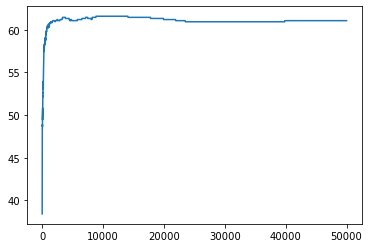

In [1572]:
plt.plot(acc);

In [1573]:
model.test(O_1,Y_te_Mat)

58.549222797927456